Boundary exploration of the universal model for 6 sites and 4 sties, without the constraints for the coefficients in the numerator being at most as high as the corresponding coefficients in the denominator. The goal is not to get the full boundary, just to get a few points in order to show that it can overcome the universal boundary that emerges when the constraints are maintained.

I have not rerun this after moving into the repository directory structure, so paths may need to be updated.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os
sys.path.append('../../../work2/shared/utilsGRF')
import BoundaryFinder as BF
import AnalyseBoundarysearch
import pandas as pd
def plot_hillline(ax,nmax=1,colordict=None,textonly=0):
    nrange=np.arange(1.8,nmax+0.2,0.1)
    hillline=np.vstack([BF.position_steepness_hill(n) for n in nrange])
    #fig,ax=plt.subplots(1,1,figsize=(5,5))
    ax.plot(hillline[:,0],hillline[:,1],color='gray',linestyle='--',label='Hill line')
    for n in range(2,nmax):
        ph,sh=BF.position_steepness_hill(n)
        if colordict is None:
            color="gray"
        else:
            color=colordict[n]
        ax.scatter(ph,sh,color=color,marker="x")
        if textonly==0:
            ax.text(ph*1.03,sh*0.97,'n=%d'%n,color=color)
        else:
            if textonly==n:
                ax.text(ph*1.03,sh*0.97,'n=%d'%n,color=color)
    #ax.legend()
    #ax.set_xlim(0.499,1.2)
    #ax.set_xlabel('position')
    #ax.set_ylabel('steepness')
    return ax

In [2]:
#explore without constraint on num<den
sys.path.append("../bin")
from functools import partial
import N4univ, N6univ
import json
import time
def function_tostring(x):
    if isinstance(x, np.ndarray):
        return ','.join(map(str,x))
    else:
        return x.__name__
    
def func(pars,psfunc=None):
    out=[None,None]
    result=psfunc(pars,absder=True)
    if result[0]>0:
        out=[result[0],result[1]]
    return out

In [3]:
step=0.005
stp_ar=np.arange(0.3,1.7+step,step)
pos_ar=np.arange(0.4,2.5+step,step)

extremesu=[-2,2]
prob_par=0.5
prob_replace=0.2
minp,maxp=[1e-1,1e1]
niters_conv=10
extr_uniform=[extremesu[0],extremesu[1]]
niters=100
L=15

In [4]:
#execute for N=6

jid=1

instance=N6univ.GRFCalculations_ld_50_15()
othervars=np.array([0]) #no effect

def func_(pars):
    out=[None,None]
    instance.fill_num_den(pars,othervars)
    result=instance.interfaceps(minx0=False,maxx1=False,absder=True)
    if result[0]>0:
        out=[result[0],result[1]]
    return out


func_.__name__="N6univ"

#these would be the constraints for num<den
#constraints={1:{'target':0,'lt':1},3:{'target':2,'lt':1},
#                5:{'target':4,'lt':1},7:{'target':6,'lt':1},9:{'target':8,'lt':1},11:{'target':10,'lt':1},13:{'target':12,'lt':1}}
settings={'pars_limit':[minp,maxp],
          'compute_x_y_f':func_,
          'npars':14,
          'constraints':None,
           'row_ar':stp_ar,
          'col_ar':pos_ar,
          'seed':jid,
         'mat':None,
         'mat_pars':None}


name_save='N6univnoconstraints'
print(name_save)
outfolder=name_save+"_out"
if not os.path.isdir(outfolder):
    os.mkdir(outfolder)

args={'niters':niters,
      'niters_conv':niters_conv,
      'niters_conv_points':1000,
      'niters_save':3,
      'folder_save':outfolder,
       'name_save':name_save, 
      'prob_par':prob_par,
      'prob_replace':prob_replace,
      'extr_uniform':extr_uniform,
      'L_project':L,
      'plotting':False,
      'verbose':True,
       'dofirstmutate':True,'dopullcentroids':True,'dopulltangents':True}


BE=BF.BoundaryExplorer(**settings)
if settings['mat'] is None:
    BE.get_initial_points(10)
BE.extend_boundary(**args)

outfolder_final=os.path.join(outfolder,"final_results")
if not os.path.isdir(outfolder_final):
    os.mkdir(outfolder_final)
name='%s_%d_last'%(name_save,jid)
np.save(os.path.join(outfolder_final,'mat_'+name+'.npy'),BE.mat)
np.save(os.path.join(outfolder_final,'mat_pars_'+name+'.npy'),BE.mat_pars)


N6univnoconstraints
0,0 16.0.,1,1 45.0.,2,2 135.0.,3,3 349.0.,4,4 600.0.,5,5 818.0.,6,6 777.0.,7,7 770.0.,8,8 713.0.,9,9 607.0.,10,10 507.0.,11,11 434.0.,12,12 340.0.,13,13 317.0.,14,14 240.0.,15,15 167.0.,16,16 191.0.,17,17 161.0.,18,18 145.0.,19,19 129.0.,20,20 114.0.,21,21 96.0.,22,22 84.0.,23,23 87.0.,24,24 66.0.,25,25 57.0.,26,26 55.0.,27,27 48.0.,28,28 42.0.,29,29 43.0.,30,30 38.0.,31,31 31.0.,32,32 28.0.,33,33 29.0.,34,34 29.0.,35,35 37.0.,36,36 26.0.,37,37 23.0.,38,38 28.0.,39,39 29.0.,40,40 29.0.,41,41 16.0.,42,42 23.0.,43,43 13.0.,44,44 17.0.,45,45 18.0.,46,46 10.0.,47,47 15.0.,48,48 16.0.,49,49 15.0.,50,50 14.0.,51,51 4.0.,52,52 10.0.,53,53 13.0.,54,54 12.0.,55,55 12.0.,56,56 9.0.,57,57 10.0.,58,58 6.0.,59,59 11.0.,60,60 10.0.,61,61 6.0.,62,62 16.0.,63,63 7.0.,64,64 3.0.,65,65 9.0.,66,66 4.0.,67,67 13.0.,68,68 8.0.,69,69 5.0.,70,70 8.0.,71,71 6.0.,72,72 5.0.,73,73 8.0.,74,74 6.0.,75,75 2.0.,76,76 7.0.,77,77 6.0.,78,78 7.0.,79,79 7.0.,80,80 3.0.,81,81 2.0.,82,82 9.0.,83,83 5.

In [5]:
#save settings 
outfnames=[os.path.join(outfolder,name_save+'_%d.sett'%jid),os.path.join(outfolder_final,name_save+'_%d.sett'%jid)]
for fname in outfnames:
    outf=open(fname,'w')
    #outf.write(time.ctime()+'\n')
    #with open(outf, 'w') as file:
    json.dump(dict({'time':time.ctime()},**settings),outf,default=function_tostring) # use `json.loads` to do the reverse
    outf.close()

    outf=open(fname.replace('.sett','.args'),'w')
    #outf.write(time.ctime()+'\n')
    #with open(outf, 'w') as file:
    json.dump(dict({'time':time.ctime()},**args),outf) # use `json.loads` to do the reverse
    outf.close()

N6univnoconstraints
folder to check N6univnoconstraints_out/tocheck_N6univnoconstraints
folders are
['N6univnoconstraints_out/final_results/mat_N6univnoconstraints_1']
Processing [1]
jid is 1
N6univnoconstraints_out/final_results/mat_N6univnoconstraints_1_last.npy
no jid_num, timediff and converged unknown.
writing file to check in mat_N6univnoconstraints_1.in


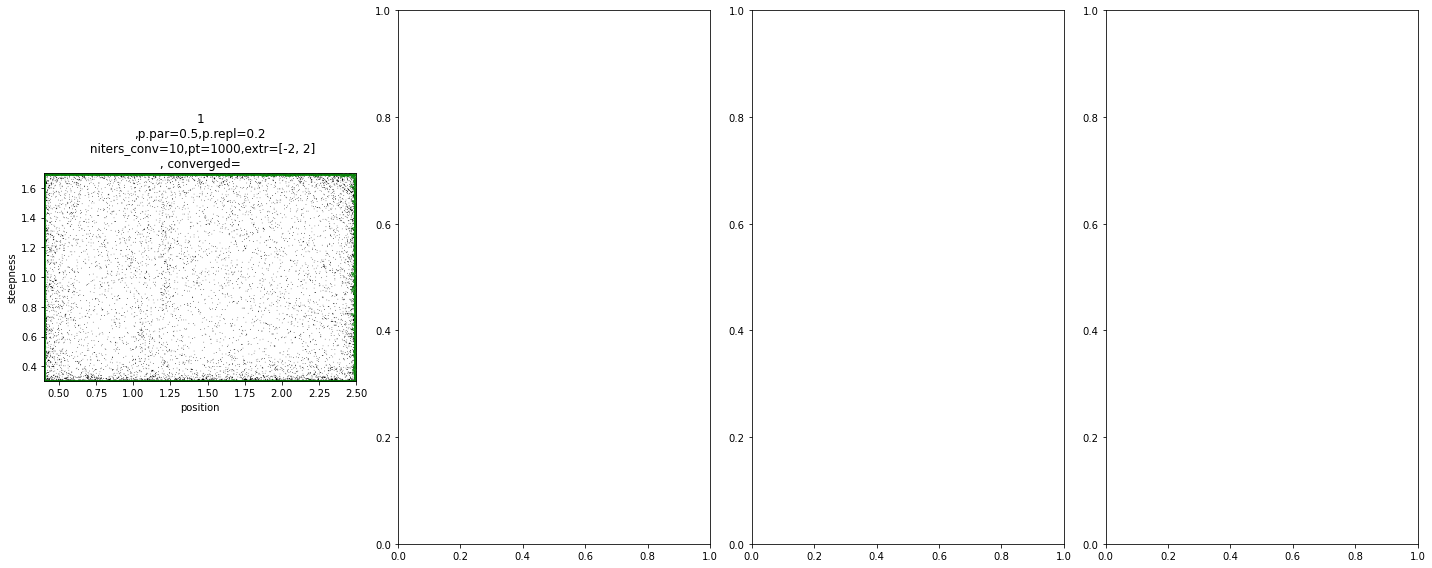

folder to check with mathematica is N6univnoconstraints_out/tocheck_N6univnoconstraints
(281, 421)


../../../work2/shared/utilsGRF/AnalyseBoundarysearch.py:410: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  allpdf=pd.DataFrame(np.array(allpointslist),columns=allpointscolnames)


In [6]:
#doublecheck with mathematica
#
basename=name_save
print(basename)
processrawdata=True

#if processrawdata:
allbs=dict()
allchecks=dict()

args={'njobs':1, 
      'final':True, 
      'printtocheck':True, 
      'fldr':outfolder,
      'basename':basename,
    'joinmats':True,
      'jid_num':None, 
      'reference':None, 
      'xlabel':'position', 'ylabel':'steepness',
      'getallpoints':True,
     'septime':" ",
     'difparslimit':True}
results=AnalyseBoundarysearch.plot_boundaries_search(**args)
   

In [12]:
os.listdir("../bin")

['N6Pol_basal.cpp',
 'N4MWC.cpp',
 'N4Pol_basal.cpython-38-darwin.so',
 'ladder_6conf.wl',
 'N6univ_manualfix.nb',
 'N6MWC_manualfix.nb',
 'N6av.wl',
 '.DS_Store',
 'TFA4_TFB2_allornone_manualfix.nb',
 'N4av.nb',
 'N4MWC_manualfix.wl',
 'N4av_noneq_25.cpython-38-darwin.so',
 'N6MWC.cpp',
 'TFA4_TFB2_AminusBav_manualfix.nb',
 'ladder_6conf.cpp',
 'N4univ_manualfix.wl',
 'N6Pol.nb',
 'N4Pol.nb',
 'N6Pol_basal.nb',
 'N6univ.cpython-38-darwin.so',
 'ladder_5conf.cpp',
 'N4Pol_basal.wl',
 'old',
 'N6MWC.cpython-38-darwin.so',
 'ladder_6conf.cpython-38-darwin.so',
 'N6Pol.cpython-38-darwin.so',
 'ladder_5conf.nb',
 'N4av_noneq_100.cpython-38-darwin.so',
 'N4univ_manualfix.nb',
 'TFA4_TFB2.cpp',
 'N6Pol.wl',
 'N6univ.cpp',
 'N4av_noneq_25.cpp',
 'N4Pol.wl',
 'N4av.cpython-38-darwin.so',
 'N6Pol_basal.wl',
 'N6Pol_basal.cpython-38-darwin.so',
 'TFA4_TFB2_allornone.cpython-38-darwin.so',
 'N4MWC.cpython-38-darwin.so',
 'N4Pol_basal.nb',
 'ladder_5conf.wl',
 'N4univ.cpython-38-darwin.so',
 'N4Po

In [14]:
checkf=results[1] 
print(checkf)
#tolerance to 0.025
command="wolframscript -file ../bin/N6univ_manualfix_bigdif.wl '%s' True"%checkf
! $command

N6univnoconstraints_out/tocheck_N6univnoconstraints
mat_N6univnoconstraints_1.in
mat_N6univnoconstraints_1_checked.out
First line
absder True
starting at
N6univnoconstraints_out/tocheck_N6univnoconstraints
Defined GRF

                                   -308
General::munfl: 0.752099 2.81023 10     is too small to represent as a normalized machine number; precision may be lost.

                     1
General::munfl: ----------- is too small to represent as a normalized machine number; precision may be lost.
                        307
                4.669 10

                      1
General::munfl: ------------- is too small to represent as a normalized machine number; precision may be lost.
                          307
                6.15523 10

General::stop: Further output of General::munfl will be suppressed during this calculation.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and n

0.1 10.0


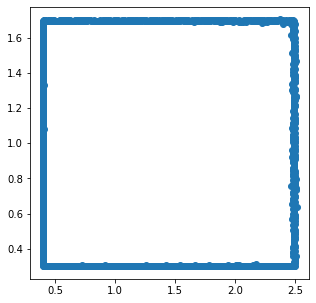

In [15]:
checkedfiles=[x for x in os.listdir(checkf) if ".out" in x and "checked" in x]
              
allpos=[]
allrhos=[]
for f in checkedfiles:
    data=pd.read_csv(os.path.join(checkf,f),sep=",|;",engine="python") #sep and engine are used to indicate that there are 2 separators
    pos=data["pos"].values
    stp=data["rho"].values
    print(data.values[:,2:].min(),data.values[:,2:].max())
    allpos.extend(pos)
    allrhos.extend(stp)
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.scatter(allpos,allrhos)
plt.show()


In [17]:
#execute for N=4
jid=1
instance=N4univ.GRFCalculations_ld_50_15()
othervars=np.array([0]) #no effect

def func_(pars):
    out=[None,None]
    instance.fill_num_den(pars,othervars)
    result=instance.interfaceps(minx0=False,maxx1=False,absder=True)
    if result[0]>0:
        out=[result[0],result[1]]
    return out

func_.__name__="N4univ"

#these would be the constraints for num<den
#constraints={1:{'target':0,'lt':1},3:{'target':2,'lt':1},
#                5:{'target':4,'lt':1},7:{'target':6,'lt':1},9:{'target':8,'lt':1},11:{'target':10,'lt':1},13:{'target':12,'lt':1}}
settings={'pars_limit':[minp,maxp],
          'compute_x_y_f':func_,
          'npars':10,
          'constraints':None,
           'row_ar':stp_ar,
          'col_ar':pos_ar,
          'seed':jid,
         'mat':None,
         'mat_pars':None}


name_save='N4univnoconstraints'
print(name_save)
outfolder=name_save+"_out"
if not os.path.isdir(outfolder):
    os.mkdir(outfolder)

args={'niters':niters,
      'niters_conv':niters_conv,
      'niters_conv_points':1000,
      'niters_save':3,
      'folder_save':outfolder,
       'name_save':name_save, 
      'prob_par':prob_par,
      'prob_replace':prob_replace,
      'extr_uniform':extr_uniform,
      'L_project':L,
      'plotting':False,
      'verbose':True,
       'dofirstmutate':True,'dopullcentroids':True,'dopulltangents':True}


BE=BF.BoundaryExplorer(**settings)
if settings['mat'] is None:
    BE.get_initial_points(10)
BE.extend_boundary(**args)

outfolder_final=os.path.join(outfolder,"final_results")
if not os.path.isdir(outfolder_final):
    os.mkdir(outfolder_final)
name='%s_%d_last'%(name_save,jid)
np.save(os.path.join(outfolder_final,'mat_'+name+'.npy'),BE.mat)
np.save(os.path.join(outfolder_final,'mat_pars_'+name+'.npy'),BE.mat_pars)



N4univnoconstraints
0,0 16.0.,1,1 46.0.,2,2 148.0.,3,3 383.0.,4,4 633.0.,5,5 794.0.,6,6 765.0.,7,7 689.0.,8,8 652.0.,9,9 608.0.,10,10 539.0.,11,11 430.0.,12,12 375.0.,13,13 321.0.,14,14 280.0.,15,15 240.0.,16,16 205.0.,17,17 173.0.,18,18 168.0.,19,19 127.0.,20,20 108.0.,21,21 89.0.,22,22 90.0.,23,23 67.0.,24,24 72.0.,25,25 77.0.,26,26 55.0.,27,27 52.0.,28,28 45.0.,29,29 34.0.,30,30 41.0.,31,31 47.0.,32,32 31.0.,33,33 28.0.,34,34 21.0.,35,35 37.0.,36,36 29.0.,37,37 27.0.,38,38 20.0.,39,39 19.0.,40,40 15.0.,41,41 20.0.,42,42 22.0.,43,43 13.0.,44,44 21.0.,45,45 23.0.,46,46 13.0.,47,47 16.0.,48,48 16.0.,49,49 14.0.,50,50 15.0.,51,51 9.0.,52,52 6.0.,53,53 9.0.,54,54 13.0.,55,55 14.0.,56,56 14.0.,57,57 6.0.,58,58 10.0.,59,59 7.0.,60,60 14.0.,61,61 11.0.,62,62 5.0.,63,63 7.0.,64,64 9.0.,65,65 7.0.,66,66 4.0.,67,67 6.0.,68,68 6.0.,69,69 7.0.,70,70 3.0.,71,71 7.0.,72,72 10.0.,73,73 3.0.,74,74 8.0.,75,75 4.0.,76,76 7.0.,77,77 5.0.,78,78 3.0.,79,79 4.0.,80,80 8.0.,81,81 1.0.,82,82 5.0.,83,83 6.0.

In [18]:
outfnames=[os.path.join(outfolder,name_save+'_%d.sett'%jid),os.path.join(outfolder_final,name_save+'_%d.sett'%jid)]
for fname in outfnames:
    outf=open(fname,'w')
    #outf.write(time.ctime()+'\n')
    #with open(outf, 'w') as file:
    json.dump(dict({'time':time.ctime()},**settings),outf,default=function_tostring) # use `json.loads` to do the reverse
    outf.close()

    outf=open(fname.replace('.sett','.args'),'w')
    #outf.write(time.ctime()+'\n')
    #with open(outf, 'w') as file:
    json.dump(dict({'time':time.ctime()},**args),outf) # use `json.loads` to do the reverse
    outf.close()

N4univnoconstraints
folder to check N4univnoconstraints_out/tocheck_N4univnoconstraints
folders are
['N4univnoconstraints_out/final_results/mat_N4univnoconstraints_1']
Processing [1]
jid is 1
N4univnoconstraints_out/final_results/mat_N4univnoconstraints_1_last.npy
no jid_num, timediff and converged unknown.
writing file to check in mat_N4univnoconstraints_1.in


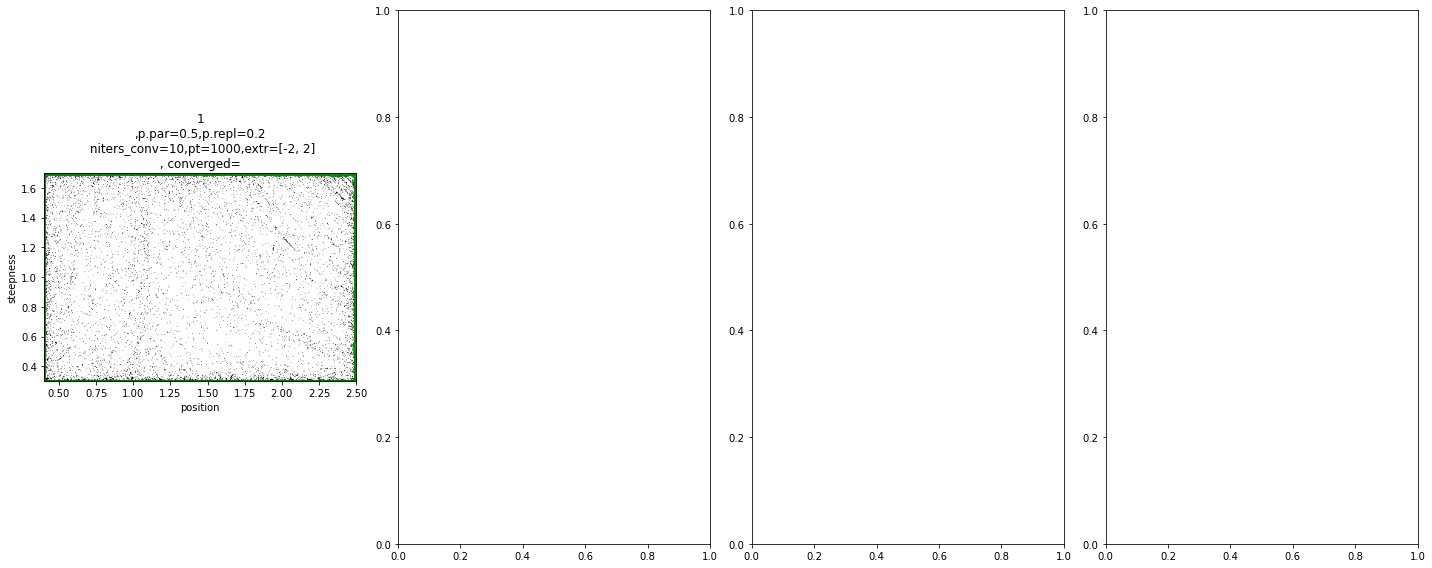

folder to check with mathematica is N4univnoconstraints_out/tocheck_N4univnoconstraints
(281, 421)


In [19]:
basename=name_save
print(basename)
processrawdata=True

#if processrawdata:
allbs=dict()
allchecks=dict()

args={'njobs':1, 
      'final':True, 
      'printtocheck':True, 
      'fldr':outfolder,
      'basename':basename,
    'joinmats':True,
      'jid_num':None, 
      'reference':None, 
      'xlabel':'position', 'ylabel':'steepness',
      'getallpoints':True,
     'septime':" ",
     'difparslimit':True}
results=AnalyseBoundarysearch.plot_boundaries_search(**args)
   

In [20]:
checkf=results[1] 
print(checkf)
command="wolframscript -file ../bin/N4univ_manualfix.wl '%s' True"%checkf
! $command

N4univnoconstraints_out/tocheck_N4univnoconstraints
First line
absder True
starting at
N4univnoconstraints_out/tocheck_N4univnoconstraints
mat_N4univnoconstraints_1.in
mat_N4univnoconstraints_1_checked.out
Defined GRF

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.
1,
Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

General::stop: Further output of Solve::ratnz will be suppressed during this calculation.
2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,6

In [22]:
checkf="N4univnoconstraints_out/tocheck_N4univnoconstraints"
absder="True"
#in this case tolerance is 0.0075
command="wolframscript -file ../bin/N4univ_manualfix_bigdif.wl '%s' '%s'"%(checkf,absder)  
! $command

mat_N4univnoconstraints_1.in
mat_N4univnoconstraints_1_checked.out
First line
absder True
starting at
N4univnoconstraints_out/tocheck_N4univnoconstraints
Defined GRF

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.
1,
Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

General::stop: Further output of Solve::ratnz will be suppressed during this calculation.
2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79

0.1 10.0


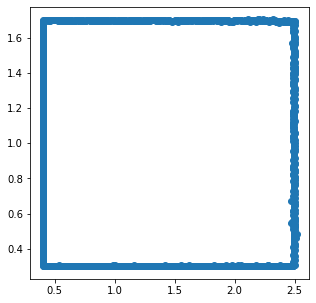

In [23]:
checkedfiles=[x for x in os.listdir(checkf) if ".out" in x and "checked" in x]
              
allpos=[]
allrhos=[]
for f in checkedfiles:
    data=pd.read_csv(os.path.join(checkf,f),sep=",|;",engine="python") #sep and engine are used to indicate that there are 2 separators
    pos=data["pos"].values
    stp=data["rho"].values
    print(data.values[:,2:].min(),data.values[:,2:].max())
    allpos.extend(pos)
    allrhos.extend(stp)
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.scatter(allpos,allrhos)
plt.show()

In [24]:
import alphashape
#from descartes import PolygonPatch

# Make figure

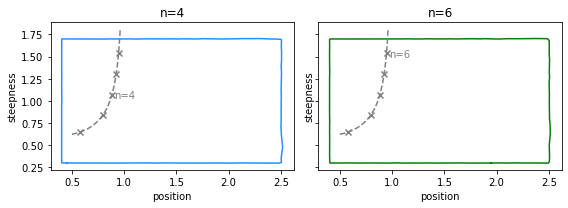

In [25]:
fig,axes=plt.subplots(1,2,figsize=(8,3),sharex=True,sharey=True)
for n,Nsites in enumerate(["N4","N6"]):
    ax=axes[n]
    ax.set_title("n=%s"%(Nsites[-1]))
    
    if Nsites=="N4":
        color="dodgerblue"
        checkedf="./N4univnoconstraints_out/tocheck_N4univnoconstraints/mat_N4univnoconstraints_1_checked.out"
    else:
        color="green"
        checkedf="./N6univnoconstraints_out/tocheck_N6univnoconstraints/mat_N6univnoconstraints_1_checked.out"
    data=pd.read_csv(checkedf,sep=",|;",engine="python") #sep and engine are used to indicate that there are 2 separators
    pos=data["pos"].values
    stp=data["rho"].values
    
    l_p=[(pos[j],stp[j]) for j in range(len(pos))]

    ashape=alphashape.alphashape(l_p,alpha=2)

    ax.plot(*ashape.exterior.xy,color=color)
    #ax.add_patch(ashape)
    #ax.scatter(pos,stp)
    

    ax.set_xlabel("position")
    ax.set_ylabel("steepness")
    ax=plot_hillline(ax,nmax=7,textonly=int(Nsites[-1]))
    #ax.legend(title="p=")
plt.tight_layout()
plt.savefig("../figs/FigS1.pdf")
plt.show()

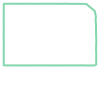

In [33]:
ashape.boundary